In [45]:
# Set up packages <- install these tasks below when you run for the first time.
!pip install spacy
!pip install newsapi-python
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [46]:
import os
import pickle
import pandas as pd # to get dataframe
import string # for punctuation
import matplotlib.pyplot as plt
# for 
import en_core_web_sm
import spacy
from collections import Counter
from wordcloud import WordCloud
from newsapi import NewsApiClient
# these for create and save to google drive
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
from google.colab import drive

In [47]:
my_key = "08ba6dd4d7134eefa9de192d94e6729a"
nlp_eng = en_core_web_sm.load()
newsapi = NewsApiClient (api_key=my_key)

In [48]:
def getall_articles(api_calls, start_date, end_date, num_pages):
  result = []
  for i in range(1,num_pages+1):
    result.append(api_calls.get_everything(q='coronavirus', language='en', 
                                           from_param=start_date, to=end_date, 
                                           sort_by='relevancy', page=i))
  return result

articles = getall_articles(newsapi, '2020-09-30', '2020-10-30', 5)

In [49]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [50]:
filename = 'articlesCOVID.csv'
pickle.dump(articles, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
filepath = F"/content/gdrive/My Drive/CS4650/articlesCOVID.csv"
pickle.dump(loaded_model, open(filepath, 'wb'))

In [51]:
dados = []
for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        titles = title.split(' ')
        description = x['description']
        descriptions = description.split(' ')
        content = x['content']
        date = x['publishedAt']
        dates = date.split('T')
        dados.append({'title':titles[0], 'date':dates[0], 'desc':descriptions[0], 'content':content})

df = pd.DataFrame(dados)
df = df.dropna()
df.head(5)
df.to_csv(filepath)

In [52]:
def get_keywords_eng (text):
  results = []
  pos_tagging = ['VERB', 'NOUN', 'PROPN']
  nlp_parser = nlp_eng(text.lower())
  for token in nlp_parser:
    if (token.text in nlp_eng.Defaults.stop_words or token.text in string.punctuation):
      continue
    if (token.pos_ in pos_tagging):
      results.append(token.text)
  return results

results = []
for content in df.content.values:
  results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])

df['keywords'] = results

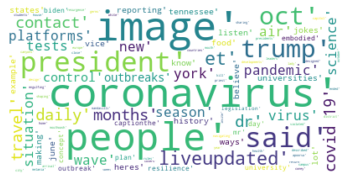

In [53]:
text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()